# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units = 10, num_neurons = [512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation = "relu", name = "hidden_layer" + str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation = "relu", name = "hidden_layer" + str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation = "softmax", name = "output")(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
    
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""

LEARNING_RATE = [0.1,0.001]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95


In [7]:
optimizer_ = [keras.optimizers.SGD(lr=LEARNING_RATE[0], nesterov=True, momentum=MOMENTUM),
            keras.optimizers.Adam(lr=LEARNING_RATE[0]),
            keras.optimizers.Adagrad(lr=LEARNING_RATE[0]),
            keras.optimizers.RMSprop(lr=LEARNING_RATE[0]),
            keras.optimizers.SGD(lr=LEARNING_RATE[1], nesterov=True, momentum=MOMENTUM),
            keras.optimizers.Adam(lr=LEARNING_RATE[1]),
            keras.optimizers.Adagrad(lr=LEARNING_RATE[1]),
            keras.optimizers.RMSprop(lr=LEARNING_RATE[1]),
            ]

mod = ['SGD','ADAM','Adagrad','RMSprop']*2

In [8]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for index,opt in enumerate(optimizer_):
    
    keras.backend.clear_session()
    print("Experiment with Optimizer = %s" % (mod[index]))  
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = opt)

    model.fit(x_train, y_train,
             epochs = EPOCHS,
             batch_size = BATCH_SIZE,
             validation_data = (x_test, y_test),
             shuffle = True)

    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    if index<4:
        learn = 0.1
    else:
        learn = 0.01
    
    exp_name_tag = "Opt = " + str(mod[index]) + ", lr = " + str(learn)

    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Optimizer = SGD
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=========

50000/50000 [==============================] - 7s 135us/step - loss: 1.4809 - accuracy: 0.4795 - val_loss: 1.6948 - val_accuracy: 0.4273
Epoch 49/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.4712 - accuracy: 0.4820 - val_loss: 1.6729 - val_accuracy: 0.4255
Epoch 50/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.4617 - accuracy: 0.4878 - val_loss: 1.7121 - val_accuracy: 0.4105
Experiment with Optimizer = ADAM
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_____________________________________________________

Epoch 46/50
50000/50000 [==============================] - 8s 158us/step - loss: 2.3075 - accuracy: 0.0985 - val_loss: 2.3056 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 8s 160us/step - loss: 2.3066 - accuracy: 0.0991 - val_loss: 2.3102 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 8s 160us/step - loss: 2.3072 - accuracy: 0.0985 - val_loss: 2.3054 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 8s 161us/step - loss: 2.3069 - accuracy: 0.0998 - val_loss: 2.3061 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 8s 160us/step - loss: 2.3068 - accuracy: 0.1027 - val_loss: 2.3043 - val_accuracy: 0.1000
Experiment with Optimizer = Adagrad
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
____

50000/50000 [==============================] - 7s 132us/step - loss: 1.4493 - accuracy: 0.4805 - val_loss: 1.5732 - val_accuracy: 0.4426
Epoch 44/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.4417 - accuracy: 0.4825 - val_loss: 1.5649 - val_accuracy: 0.4453
Epoch 45/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.4392 - accuracy: 0.4855 - val_loss: 1.7154 - val_accuracy: 0.4084
Epoch 46/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.4261 - accuracy: 0.4897 - val_loss: 1.5796 - val_accuracy: 0.4440
Epoch 47/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.4259 - accuracy: 0.4877 - val_loss: 1.6894 - val_accuracy: 0.4089
Epoch 48/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.4206 - accuracy: 0.4925 - val_loss: 1.5768 - val_accuracy: 0.4490
Epoch 49/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.4085 - accuracy: 0.4980 - val_loss:

Epoch 41/50
50000/50000 [==============================] - 7s 141us/step - loss: 2.3080 - accuracy: 0.1010 - val_loss: 2.3117 - val_accuracy: 0.1000
Epoch 42/50
50000/50000 [==============================] - 7s 140us/step - loss: 2.3080 - accuracy: 0.0980 - val_loss: 2.3120 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 7s 142us/step - loss: 2.3075 - accuracy: 0.1003 - val_loss: 2.3178 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 7s 144us/step - loss: 2.3082 - accuracy: 0.1007 - val_loss: 2.3104 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 7s 141us/step - loss: 2.3076 - accuracy: 0.0999 - val_loss: 2.3118 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 7s 140us/step - loss: 2.3078 - accuracy: 0.1007 - val_loss: 2.3061 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 7s 140us/step - loss: 2.3075 - accuracy: 0.1021

50000/50000 [==============================] - 7s 137us/step - loss: 1.0177 - accuracy: 0.6428 - val_loss: 1.3630 - val_accuracy: 0.5212
Epoch 39/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.9999 - accuracy: 0.6478 - val_loss: 1.3980 - val_accuracy: 0.5137
Epoch 40/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.9898 - accuracy: 0.6518 - val_loss: 1.3655 - val_accuracy: 0.5266
Epoch 41/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.9803 - accuracy: 0.6560 - val_loss: 1.3780 - val_accuracy: 0.5279
Epoch 42/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.9636 - accuracy: 0.6622 - val_loss: 1.3528 - val_accuracy: 0.5334
Epoch 43/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.9535 - accuracy: 0.6643 - val_loss: 1.4070 - val_accuracy: 0.5182
Epoch 44/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.9358 - accuracy: 0.6697 - val_loss:

Epoch 36/50
50000/50000 [==============================] - 8s 162us/step - loss: 0.8365 - accuracy: 0.7022 - val_loss: 1.5277 - val_accuracy: 0.5268
Epoch 37/50
50000/50000 [==============================] - 8s 162us/step - loss: 0.8167 - accuracy: 0.7083 - val_loss: 1.5262 - val_accuracy: 0.5223
Epoch 38/50
50000/50000 [==============================] - 8s 162us/step - loss: 0.7953 - accuracy: 0.7140 - val_loss: 1.5108 - val_accuracy: 0.5285
Epoch 39/50
50000/50000 [==============================] - 8s 164us/step - loss: 0.7876 - accuracy: 0.7171 - val_loss: 1.5121 - val_accuracy: 0.5264
Epoch 40/50
50000/50000 [==============================] - 8s 162us/step - loss: 0.7800 - accuracy: 0.7207 - val_loss: 1.5569 - val_accuracy: 0.5172
Epoch 41/50
50000/50000 [==============================] - 8s 162us/step - loss: 0.7487 - accuracy: 0.7332 - val_loss: 1.5735 - val_accuracy: 0.5268
Epoch 42/50
50000/50000 [==============================] - 8s 162us/step - loss: 0.7430 - accuracy: 0.7349

50000/50000 [==============================] - 7s 136us/step - loss: 1.3377 - accuracy: 0.5339 - val_loss: 1.4204 - val_accuracy: 0.4932
Epoch 34/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.3310 - accuracy: 0.5372 - val_loss: 1.4143 - val_accuracy: 0.5002
Epoch 35/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.3262 - accuracy: 0.5388 - val_loss: 1.4076 - val_accuracy: 0.5035
Epoch 36/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.3211 - accuracy: 0.5410 - val_loss: 1.4415 - val_accuracy: 0.4909
Epoch 37/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.3163 - accuracy: 0.5415 - val_loss: 1.4044 - val_accuracy: 0.5022
Epoch 38/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.3099 - accuracy: 0.5455 - val_loss: 1.4071 - val_accuracy: 0.5017
Epoch 39/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.3061 - accuracy: 0.5450 - val_loss:

Epoch 31/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.0521 - accuracy: 0.6212 - val_loss: 1.6515 - val_accuracy: 0.4790
Epoch 32/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.0431 - accuracy: 0.6267 - val_loss: 1.5540 - val_accuracy: 0.5005
Epoch 33/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.0248 - accuracy: 0.6299 - val_loss: 1.5918 - val_accuracy: 0.4970
Epoch 34/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.0115 - accuracy: 0.6367 - val_loss: 1.5858 - val_accuracy: 0.4861
Epoch 35/50
50000/50000 [==============================] - 7s 147us/step - loss: 0.9927 - accuracy: 0.6428 - val_loss: 1.6356 - val_accuracy: 0.4923
Epoch 36/50
50000/50000 [==============================] - 7s 144us/step - loss: 0.9759 - accuracy: 0.6519 - val_loss: 1.6382 - val_accuracy: 0.4853
Epoch 37/50
50000/50000 [==============================] - 7s 144us/step - loss: 0.9643 - accuracy: 0.6554

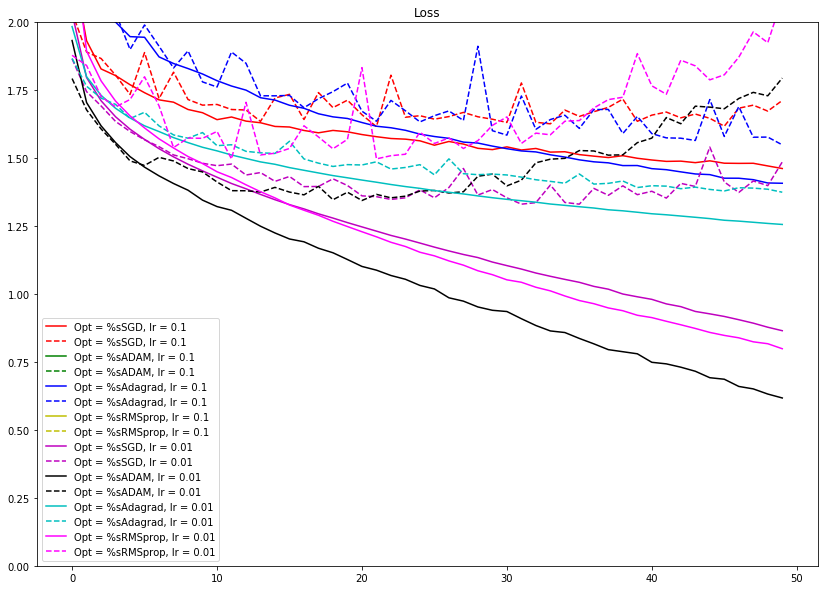

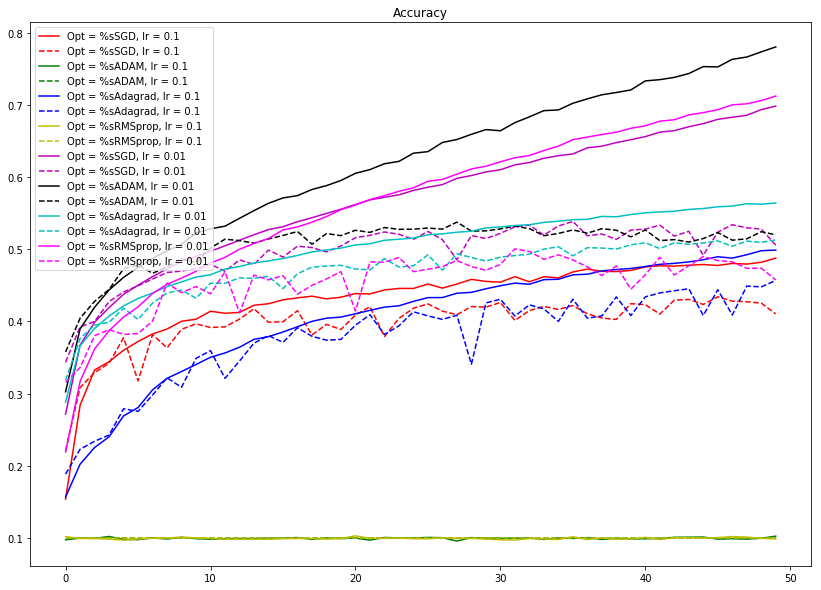

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k", "c", "fuchsia"]


plt.figure(figsize=(14,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim((0,2))
plt.legend()
plt.show()

plt.figure(figsize=(14,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()